In [70]:
import numpy as np
import pandas as pd
train_data=pd.read_csv('application_train.csv')

In [71]:
test=pd.read_csv('application_test.csv')

In [72]:
train_data.shape

(307511, 122)

In [73]:
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
         # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [74]:
# Missing values statistics
missing_values = missing_values_table(train_data)
missing_values.head(20)

Your selected dataframe has 122 columns.
There are 67 columns that have missing values.


,Missing Values,% of Total Values
COMMONAREA_MEDI,214865,69.9
COMMONAREA_AVG,214865,69.9
COMMONAREA_MODE,214865,69.9
NONLIVINGAPARTMENTS_MEDI,213514,69.4
NONLIVINGAPARTMENTS_MODE,213514,69.4
NONLIVINGAPARTMENTS_AVG,213514,69.4
FONDKAPREMONT_MODE,210295,68.4
LIVINGAPARTMENTS_MODE,210199,68.4
LIVINGAPARTMENTS_MEDI,210199,68.4
LIVINGAPARTMENTS_AVG,210199,68.4


In [75]:
# Number of each type of column
np.where(train_data.dtypes=='object')

(array([ 2,  3,  4,  5, 11, 12, 13, 14, 15, 28, 32, 40, 86, 87, 89, 90],
       dtype=int64),)

In [76]:
# Number of each type of column
train_data.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

In [77]:
train_data.select_dtypes('object').apply(pd.Series.nunique, axis = 0)


NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

In [78]:
train_data.nunique()

SK_ID_CURR                    307511
TARGET                             2
NAME_CONTRACT_TYPE                 2
CODE_GENDER                        3
FLAG_OWN_CAR                       2
FLAG_OWN_REALTY                    2
CNT_CHILDREN                      15
AMT_INCOME_TOTAL                2548
AMT_CREDIT                      5603
AMT_ANNUITY                    13672
AMT_GOODS_PRICE                 1002
NAME_TYPE_SUITE                    7
NAME_INCOME_TYPE                   8
NAME_EDUCATION_TYPE                5
NAME_FAMILY_STATUS                 6
NAME_HOUSING_TYPE                  6
REGION_POPULATION_RELATIVE        81
DAYS_BIRTH                     17460
DAYS_EMPLOYED                  12574
DAYS_REGISTRATION              15688
DAYS_ID_PUBLISH                 6168
OWN_CAR_AGE                       62
FLAG_MOBIL                         2
FLAG_EMP_PHONE                     2
FLAG_WORK_PHONE                    2
FLAG_CONT_MOBILE                   2
FLAG_PHONE                         2
F

In [79]:
# Create a label encoder object
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in train_data:
    if train_data[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(train_data[col].unique())) <= 2:
            # Train on the training data
            le.fit(train_data[col])
            # Transform both training and testing data
            train_data[col] = le.transform(train_data[col])
            test[col] = le.transform(test[col])
            
            # Keep track of how many columns were label encoded
            le_count += 1
            
print('%d columns were label encoded.' % le_count)

3 columns were label encoded.


In [80]:
for i in train_data.columns:
    if train_data[i].dtypes=='object':
        print(train_data[i].value_counts())

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64
Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64
Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: NAME_INCOME_TYPE, dtype: int64
Secondary / secondary special    218391
Higher education                  74863
Incomplete higher                 10277
Lower secondary                    3816
Academic degree                     164
Name: NAME_EDUCATION_TYPE, dtype: int64
Married                 196432
Single / not married     45444
Civil marriage           29775
Separated                19770
Widow                    16088
Unknown                     

In [81]:
#one hot encoding
train_data= pd.get_dummies(train_data)

In [82]:
test= pd.get_dummies(test)

In [83]:
train_data.shape

(307511, 243)

In [84]:
test.shape

(48744, 239)

<h1>Aligning Training and Testing Data</h1>
<body>There need to be the same features (columns) in both the training and testing data. One-hot encoding has created more columns in the training data because there were some categorical variables with categories not represented in the testing data. To remove the columns in the training data that are not in the testing data, we need to align the dataframes. First we extract the target column from the training data (because this is not in the testing data but we need to keep this information). When we do the align, we must make sure to set axis = 1 to align the dataframes based on the columns and not on the rows!</body>

In [85]:
train_target=train_data['TARGET']

In [86]:
train_data, test = train_data.align(test, join = 'inner', axis = 1)

In [87]:
train_data.shape

(307511, 239)

In [88]:
test.shape

(48744, 239)

In [89]:
train_data['TARGET']=train_target

In [90]:
train_data.shape

(307511, 240)

<h1>Exterior sources</h1>

In [91]:
# Extract the EXT_SOURCE variables and show correlations
ext_data = train_data[['TARGET', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]
ext_data_corrs = ext_data.corr()
ext_data_corrs

,TARGET,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_BIRTH
TARGET,1.000000,-0.155317,-0.160472,-0.178919,0.078239
EXT_SOURCE_1,-0.155317,1.000000,0.213982,0.186846,-0.600610
EXT_SOURCE_2,-0.160472,0.213982,1.000000,0.109167,-0.091996
EXT_SOURCE_3,-0.178919,0.186846,0.109167,1.000000,-0.205478
DAYS_BIRTH,0.078239,-0.600610,-0.091996,-0.205478,1.000000


In [92]:
poly_features= train_data[['TARGET','EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]


In [93]:
poly_features_test= test[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]


In [94]:
# to impute missing values we gonna use sklearn.imputer method 

from sklearn.preprocessing import Imputer
imputer= Imputer(strategy='median')
#poly_features['TARGET']=poly_target
poly_target = poly_features['TARGET']
poly_features = poly_features.drop(columns = ['TARGET'])
# Need to impute missing values
poly_features = imputer.fit_transform(poly_features)
poly_features_test = imputer.transform(poly_features_test)


# Create the polynomial object with specified degree
#poly_transformer = PolynomialFeatures(degree = 3)

In [95]:
from sklearn.preprocessing import PolynomialFeatures

# Create the polynomial object with specified degree
poly_transformer = PolynomialFeatures(degree = 3)

In [96]:
# Train the polynomial features
poly_transformer.fit(poly_features)

# Transform the features
poly_features = poly_transformer.transform(poly_features)
poly_features_test = poly_transformer.transform(poly_features_test)
print('Polynomial Features shape: ', poly_features.shape)

Polynomial Features shape:  (307511, 35)


In [97]:
poly_transformer.get_feature_names(input_features = ['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH'])[:15]

['1',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'DAYS_BIRTH',
 'EXT_SOURCE_1^2',
 'EXT_SOURCE_1 EXT_SOURCE_2',
 'EXT_SOURCE_1 EXT_SOURCE_3',
 'EXT_SOURCE_1 DAYS_BIRTH',
 'EXT_SOURCE_2^2',
 'EXT_SOURCE_2 EXT_SOURCE_3',
 'EXT_SOURCE_2 DAYS_BIRTH',
 'EXT_SOURCE_3^2',
 'EXT_SOURCE_3 DAYS_BIRTH',
 'DAYS_BIRTH^2']

In [98]:
# Create a dataframe of the features 
poly_features = pd.DataFrame(poly_features, 
                             columns = poly_transformer.get_feature_names(['EXT_SOURCE_1', 'EXT_SOURCE_2', 
                                                                           'EXT_SOURCE_3', 'DAYS_BIRTH']))

In [99]:
poly_features.columns

Index(['1', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH',
       'EXT_SOURCE_1^2', 'EXT_SOURCE_1 EXT_SOURCE_2',
       'EXT_SOURCE_1 EXT_SOURCE_3', 'EXT_SOURCE_1 DAYS_BIRTH',
       'EXT_SOURCE_2^2', 'EXT_SOURCE_2 EXT_SOURCE_3',
       'EXT_SOURCE_2 DAYS_BIRTH', 'EXT_SOURCE_3^2', 'EXT_SOURCE_3 DAYS_BIRTH',
       'DAYS_BIRTH^2', 'EXT_SOURCE_1^3', 'EXT_SOURCE_1^2 EXT_SOURCE_2',
       'EXT_SOURCE_1^2 EXT_SOURCE_3', 'EXT_SOURCE_1^2 DAYS_BIRTH',
       'EXT_SOURCE_1 EXT_SOURCE_2^2', 'EXT_SOURCE_1 EXT_SOURCE_2 EXT_SOURCE_3',
       'EXT_SOURCE_1 EXT_SOURCE_2 DAYS_BIRTH', 'EXT_SOURCE_1 EXT_SOURCE_3^2',
       'EXT_SOURCE_1 EXT_SOURCE_3 DAYS_BIRTH', 'EXT_SOURCE_1 DAYS_BIRTH^2',
       'EXT_SOURCE_2^3', 'EXT_SOURCE_2^2 EXT_SOURCE_3',
       'EXT_SOURCE_2^2 DAYS_BIRTH', 'EXT_SOURCE_2 EXT_SOURCE_3^2',
       'EXT_SOURCE_2 EXT_SOURCE_3 DAYS_BIRTH', 'EXT_SOURCE_2 DAYS_BIRTH^2',
       'EXT_SOURCE_3^3', 'EXT_SOURCE_3^2 DAYS_BIRTH',
       'EXT_SOURCE_3 DAYS_BIRTH^2', 'DAYS_BIRTH^3'

In [100]:
# Add in the target
poly_features['TARGET'] = poly_target

# Find the correlations with the target
poly_corrs = poly_features.corr()['TARGET'].sort_values()

# Display most negative and most positive
print(poly_corrs.head(10))
print(poly_corrs.tail(5))

EXT_SOURCE_2 EXT_SOURCE_3                -0.193939
EXT_SOURCE_1 EXT_SOURCE_2 EXT_SOURCE_3   -0.189605
EXT_SOURCE_2^2 EXT_SOURCE_3              -0.176428
EXT_SOURCE_2 EXT_SOURCE_3^2              -0.172282
EXT_SOURCE_1 EXT_SOURCE_2                -0.166625
EXT_SOURCE_1 EXT_SOURCE_3                -0.164065
EXT_SOURCE_2                             -0.160295
EXT_SOURCE_1 EXT_SOURCE_2^2              -0.156867
EXT_SOURCE_3                             -0.155892
EXT_SOURCE_1 EXT_SOURCE_3^2              -0.150822
Name: TARGET, dtype: float64
EXT_SOURCE_1 EXT_SOURCE_2 DAYS_BIRTH    0.155891
EXT_SOURCE_2 DAYS_BIRTH                 0.156873
EXT_SOURCE_2 EXT_SOURCE_3 DAYS_BIRTH    0.181283
TARGET                                  1.000000
1                                            NaN
Name: TARGET, dtype: float64


In [101]:
poly_features.to_pickle("Poly_features.csv")

In [102]:
# Put test features into dataframe
poly_features_test = pd.DataFrame(poly_features_test, 
                                  columns = poly_transformer.get_feature_names(['EXT_SOURCE_1', 'EXT_SOURCE_2', 
                                                                                'EXT_SOURCE_3', 'DAYS_BIRTH']))

# Merge polynomial features into training dataframe
poly_features['SK_ID_CURR'] = train_data['SK_ID_CURR']
train_data_poly = train_data.merge(poly_features, on = 'SK_ID_CURR', how = 'left')

# Merge polnomial features into testing dataframe
poly_features_test['SK_ID_CURR'] = test['SK_ID_CURR']
test_poly = test.merge(poly_features_test, on = 'SK_ID_CURR', how = 'left')

# Align the dataframes
train_data_poly, test_poly = train_data_poly.align(test_poly, join = 'inner', axis = 1)

# Print out the new shapes
print('Training data with polynomial features shape: ', train_data_poly.shape)
print('Testing data with polynomial features shape:  ', test_poly.shape)

Training data with polynomial features shape:  (307511, 274)
Testing data with polynomial features shape:   (48744, 274)


In [103]:
train_data_poly.isnull().sum()


SK_ID_CURR                                     0
NAME_CONTRACT_TYPE                             0
FLAG_OWN_CAR                                   0
FLAG_OWN_REALTY                                0
CNT_CHILDREN                                   0
AMT_INCOME_TOTAL                               0
AMT_CREDIT                                     0
AMT_ANNUITY                                   12
AMT_GOODS_PRICE                              278
REGION_POPULATION_RELATIVE                     0
DAYS_BIRTH_x                                   0
DAYS_EMPLOYED                                  0
DAYS_REGISTRATION                              0
DAYS_ID_PUBLISH                                0
OWN_CAR_AGE                               202929
FLAG_MOBIL                                     0
FLAG_EMP_PHONE                                 0
FLAG_WORK_PHONE                                0
FLAG_CONT_MOBILE                               0
FLAG_PHONE                                     0
FLAG_EMAIL          

In [104]:
test_poly.isnull().sum()

SK_ID_CURR                                    0
NAME_CONTRACT_TYPE                            0
FLAG_OWN_CAR                                  0
FLAG_OWN_REALTY                               0
CNT_CHILDREN                                  0
AMT_INCOME_TOTAL                              0
AMT_CREDIT                                    0
AMT_ANNUITY                                  24
AMT_GOODS_PRICE                               0
REGION_POPULATION_RELATIVE                    0
DAYS_BIRTH_x                                  0
DAYS_EMPLOYED                                 0
DAYS_REGISTRATION                             0
DAYS_ID_PUBLISH                               0
OWN_CAR_AGE                               32312
FLAG_MOBIL                                    0
FLAG_EMP_PHONE                                0
FLAG_WORK_PHONE                               0
FLAG_CONT_MOBILE                              0
FLAG_PHONE                                    0
FLAG_EMAIL                              

In [105]:
train_data.columns

Index(['SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
       'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE',
       ...
       'WALLSMATERIAL_MODE_Block', 'WALLSMATERIAL_MODE_Mixed',
       'WALLSMATERIAL_MODE_Monolithic', 'WALLSMATERIAL_MODE_Others',
       'WALLSMATERIAL_MODE_Panel', 'WALLSMATERIAL_MODE_Stone, brick',
       'WALLSMATERIAL_MODE_Wooden', 'EMERGENCYSTATE_MODE_No',
       'EMERGENCYSTATE_MODE_Yes', 'TARGET'],
      dtype='object', length=240)

<h1>Logistic regression implementation</h1>


In [106]:
from sklearn.preprocessing import  Imputer

# Drop the target from the training data
if 'TARGET' in train_data:
    train = train_data.drop(columns = ['TARGET'])
else:
    train = train_data.copy()
    

In [107]:
# Feature names
features = list(train.columns)

In [108]:
# Copy of the testing data
test_test = test.copy() # after imputation test set would be converted to numpy array which in turn would be made difficult 
#for visualization.

In [109]:
test_test.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,...,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes
0,100001,0,0,1,0,135000.0,568800.0,20560.5,450000.0,0.018850,...,0,0,0,0,0,0,1,0,1,0
1,100005,0,0,1,0,99000.0,222768.0,17370.0,180000.0,0.035792,...,0,0,0,0,0,0,0,0,0,0
2,100013,0,1,1,0,202500.0,663264.0,69777.0,630000.0,0.019101,...,0,0,0,0,0,0,0,0,0,0
3,100028,0,0,1,2,315000.0,1575000.0,49018.5,1575000.0,0.026392,...,0,0,0,0,0,1,0,0,1,0
4,100038,0,1,0,1,180000.0,625500.0,32067.0,625500.0,0.010032,...,0,0,0,0,0,0,0,0,0,0


In [110]:
train.columns

Index(['SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
       'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE',
       ...
       'HOUSETYPE_MODE_terraced house', 'WALLSMATERIAL_MODE_Block',
       'WALLSMATERIAL_MODE_Mixed', 'WALLSMATERIAL_MODE_Monolithic',
       'WALLSMATERIAL_MODE_Others', 'WALLSMATERIAL_MODE_Panel',
       'WALLSMATERIAL_MODE_Stone, brick', 'WALLSMATERIAL_MODE_Wooden',
       'EMERGENCYSTATE_MODE_No', 'EMERGENCYSTATE_MODE_Yes'],
      dtype='object', length=239)

In [111]:
#ignore_col= ['SK_ID_CURR']

In [112]:
# Median imputation of missing values
imputer = Imputer(strategy = 'median')


#train["AMT_GOODS_PRICE"].fillna(trainX["AMT_GOODS_PRICE"].mean(), inplace = True)

In [114]:
# Fit on the training data
imputer.fit(train)
# Transform both training and testing data
train = imputer.transform(train)


In [115]:
test = imputer.transform(test)

In [116]:
print('Training data shape: ', train.shape)
print('Testing data shape: ', test.shape)

Training data shape:  (307511, 239)
Testing data shape:  (48744, 239)


In [118]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

train_X,test_X,train_y,test_y= train_test_split(train,train_target,test_size=0.25)

In [119]:
# Make the model with the specified regularization parameter
Classifier = LogisticRegression(C = 0.0001)

# Train on the training data
Classifier.fit(train_X,train_y)

LogisticRegression(C=0.0001, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [120]:
ypred= Classifier.predict(test_X) # predicting on validation set(test_X) 

In [122]:
from sklearn.metrics import accuracy_score
accuracy= accuracy_score(test_y,ypred)

In [123]:
accuracy

0.9204713962381956

### K fold cross validation

In [128]:
# k fold cross validation
from sklearn.model_selection import cross_val_score
cv_score= cross_val_score(Classifier, train,train_target,cv=10)

In [130]:
cv_score
cv_score.mean()
# after performing 10 fold cross validation cv_score is 91.9 which is similar to the accuracy_score of the logistic regresion 
#classifier

0.9192581734474498

### Applying logreg on test set

In [132]:
test_pred= Classifier.predict(test)

In [133]:
test_pred.shape

(48744,)

In [145]:
test_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [66]:
# Make predictions
# Make sure to select the second column only
#Classifier_pred = Classifier.predict_proba(test)[:, 1]
#ypred=  Classifier.predict(test)

In [139]:
# Submission dataframe
submit = test_test[['SK_ID_CURR']]
submit['TARGET'] = test_pred

submit.head()


C:\Users\ANURAG\Anaconda4\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,SK_ID_CURR,TARGET
0,100001,0
1,100005,0
2,100013,0
3,100028,0
4,100038,0


In [140]:
#pred=np.apply_along_axis((lambda X: 1 if X>0.5 else 0),0,Classifier_pred)

In [141]:
submit.to_csv("submit1")

In [142]:
submit.to_csv("Logreg.csv", index = False)

In [ ]:
### Logistic regression performs bad on test set. completely a biased model. shouldn't be deployed.

### Boosting Algorithm

In [146]:
import xgboost as xgb

In [147]:
from sklearn.model_selection import train_test_split
Xtrain, Xval, ytrain, yval = train_test_split(train_data_poly, train_target, test_size = 0.2,
                                             random_state = 1982)

In [164]:
#total rows if we append test set to the training set. just for assumption no use in later code

train_1=pd.concat([train_data_poly, test_poly], axis= 0)
train_1.shape


(356255, 274)

### Dmarices for train, val and test set

In [148]:
# to feed data to xgboost first training set is transformed into Dmatrix. in code below train, validation and test sets are transformed.
xgtrain = xgb.DMatrix(Xtrain, label = ytrain)
xgval = xgb.DMatrix(Xval, label = yval) 
xgtest = xgb.DMatrix(test_poly)

In [149]:
watchlist = [(xgtrain,'train'),(xgval, 'eval')]

In [150]:
params = {}
params["objective"] =  "binary:logistic"
params["booster"] = "gbtree"
params["max_depth"] = 7
params["eval_metric"] = 'auc'
params["subsample"] = 0.8
params["colsample_bytree"] = 0.8
params["silent"] = 1
params["seed"] = 4
params["eta"] = 0.1

plst = list(params.items())

In [151]:
num_rounds = 500
model_cv = xgb.train(plst, xgtrain, num_rounds, evals = watchlist, early_stopping_rounds = 10, verbose_eval = True)

[0]	train-auc:0.728899	eval-auc:0.719159
Multiple eval metrics have been passed: 'eval-auc' will be used for early stopping.

Will train until eval-auc hasn't improved in 10 rounds.
[1]	train-auc:0.739615	eval-auc:0.727901
[2]	train-auc:0.743493	eval-auc:0.730331
[3]	train-auc:0.746647	eval-auc:0.732157
[4]	train-auc:0.748434	eval-auc:0.733031
[5]	train-auc:0.750148	eval-auc:0.733684
[6]	train-auc:0.751463	eval-auc:0.734849
[7]	train-auc:0.753843	eval-auc:0.736392
[8]	train-auc:0.754705	eval-auc:0.736688
[9]	train-auc:0.756517	eval-auc:0.737476
[10]	train-auc:0.757547	eval-auc:0.738212
[11]	train-auc:0.758811	eval-auc:0.738531
[12]	train-auc:0.760089	eval-auc:0.739202
[13]	train-auc:0.761021	eval-auc:0.739383
[14]	train-auc:0.762294	eval-auc:0.740047
[15]	train-auc:0.763177	eval-auc:0.740336
[16]	train-auc:0.764168	eval-auc:0.740933
[17]	train-auc:0.765922	eval-auc:0.74146
[18]	train-auc:0.767297	eval-auc:0.741944
[19]	train-auc:0.768141	eval-auc:0.742264
[20]	train-auc:0.76935	eval-au

In [152]:
testxg_pred = model_cv.predict(xgtest)

In [154]:
test_id=test_test['SK_ID_CURR'] #this code is to run the above code

In [156]:
preds = pd.DataFrame({"SK_ID_CURR": test_id, "TARGET": testxg_pred})

In [157]:
preds.to_csv("xgb_model22aug.csv", index = False)

In [163]:
testxg_pred

array([0.07315244, 0.11805271, 0.02296047, ..., 0.04120607, 0.05247214,
       0.21234776], dtype=float32)

In [ ]:
#  to determine the acccuracy or any metric we need test set of target variable which we don't have with us. so I'll submit the 
# xgb_model22aug.csv to check how good the model predicts on unseen data.

### feature importance

In [166]:
feat_imp = pd.Series(model_cv.get_fscore()).sort_values(ascending=False)

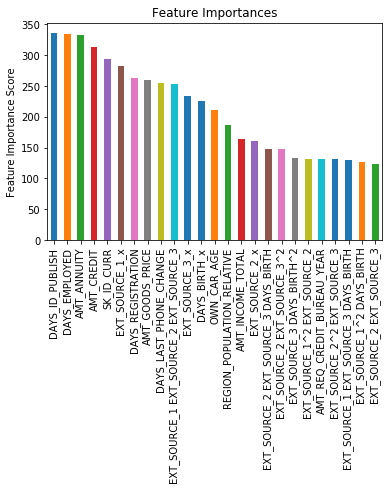

In [173]:
import matplotlib.pyplot as plt
feat_imp[:25].plot(kind='bar', title='Feature Importances')
plt.ylabel('Feature Importance Score')
plt.show()

In [165]:
import pickle
pickle.dump(model_cv, open("xgb_model13july.pickle.dat", "wb"))

In [78]:
loaded_model = pickle.load(open("xgb_model13july.pickle.dat", "rb"))